<a href="https://colab.research.google.com/github/Mugangasia/NutriPal-Recipe-Recommendation-System-/blob/main/NutriPal_Recipe_Recommendation_System.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Advanced Models

## Businesss Understanding

In [ ]:
#import the relevant libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
from surprise import Dataset, Reader
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic
from surprise import KNNWithMeans
from surprise import accuracy
from surprise import Reader
from surprise import Dataset
from surprise.prediction_algorithms import KNNWithMeans, KNNBasic
from surprise import SVD
from surprise.model_selection import train_test_split
from surprise.model_selection import cross_validate
from surprise.model_selection import GridSearchCV


# Nutrition Dataset

In [ ]:
#loading the data
Nutrition = pd.read_csv('nutrition.csv')
Nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
#getting information on the Nutrition data set
Nutrition. info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8789 entries, 0 to 8788
Data columns (total 77 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   Unnamed: 0                   8789 non-null   int64 
 1   name                         8789 non-null   object
 2   serving_size                 8789 non-null   object
 3   calories                     8789 non-null   int64 
 4   total_fat                    8789 non-null   object
 5   saturated_fat                7199 non-null   object
 6   cholesterol                  8789 non-null   object
 7   sodium                       8789 non-null   object
 8   choline                      8789 non-null   object
 9   folate                       8789 non-null   object
 10  folic_acid                   8789 non-null   object
 11  niacin                       8789 non-null   object
 12  pantothenic_acid             8789 non-null   object
 13  riboflavin                   8789

$Inference$
* The Nutrition dataset ahs Object data types and numerical data types.
* The dataset has 8789 rows and 77 columns.

In [ ]:
# craeting data set with relevant features
Nutrition_df = Nutrition.loc[:, ['name','serving_size','calories','total_fat','saturated_fat','cholesterol','sodium','potassium']]


In [ ]:
#creating a function that strips and converts feautures to float type
def clean_df(df, col_name):
  # Create a copy of the input DataFrame to avoid modifying the original data
    cleaned_df = df.copy()

    # Strip whitespace characters and replace non-numeric characters with nothing
    cleaned_df[col_name] = cleaned_df[col_name].str.strip().replace('[^\d\.]', '', regex=True)

    # Convert the column to float data type
    cleaned_df[col_name] = pd.to_numeric(cleaned_df[col_name], errors='coerce').astype(float)

    return cleaned_df


In [ ]:
#cleaning all the columnns in the nutrition data frame.
cols_to_clean = [ 'serving_size','calories', 'total_fat',
       'saturated_fat', 'cholesterol', 'sodium','potassium' ]
for col in cols_to_clean:
  Nutrition_df[col] = Nutrition_df[col].astype(str)
  Nutrition_df = clean_df(Nutrition_df, col)

In [ ]:
Nutrition.head()

,Unnamed: 0,name,serving_size,calories,total_fat,saturated_fat,cholesterol,sodium,choline,folate,...,fat,saturated_fatty_acids,monounsaturated_fatty_acids,polyunsaturated_fatty_acids,fatty_acids_total_trans,alcohol,ash,caffeine,theobromine,water
0,0,Cornstarch,100 g,381,0.1g,NaN,0,9.00 mg,0.4 mg,0.00 mcg,...,0.05 g,0.009 g,0.016 g,0.025 g,0.00 mg,0.0 g,0.09 g,0.00 mg,0.00 mg,8.32 g
1,1,"Nuts, pecans",100 g,691,72g,6.2g,0,0.00 mg,40.5 mg,22.00 mcg,...,71.97 g,6.180 g,40.801 g,21.614 g,0.00 mg,0.0 g,1.49 g,0.00 mg,0.00 mg,3.52 g
2,2,"Eggplant, raw",100 g,25,0.2g,NaN,0,2.00 mg,6.9 mg,22.00 mcg,...,0.18 g,0.034 g,0.016 g,0.076 g,0.00 mg,0.0 g,0.66 g,0.00 mg,0.00 mg,92.30 g
3,3,"Teff, uncooked",100 g,367,2.4g,0.4g,0,12.00 mg,13.1 mg,0,...,2.38 g,0.449 g,0.589 g,1.071 g,0,0,2.37 g,0,0,8.82 g
4,4,"Sherbet, orange",100 g,144,2g,1.2g,1mg,46.00 mg,7.7 mg,4.00 mcg,...,2.00 g,1.160 g,0.530 g,0.080 g,1.00 mg,0.0 g,0.40 g,0.00 mg,0.00 mg,66.10 g


In [ ]:
# checking for % of missing values in the data set
Nutrition_df.isnull().sum()/len(Nutrition_df)*100

name              0.000000
serving_size      0.000000
calories          0.000000
total_fat         0.000000
saturated_fat    18.090795
cholesterol       0.000000
sodium            0.000000
potassium         0.000000
dtype: float64

$Inference$
> saturated_fat has 18.09% of missing values.

In [ ]:
#removing the null values
mean_value = Nutrition_df["saturated_fat"].mean()
Nutrition_df["saturated_fat"].fillna(mean_value,inplace=True)


In [ ]:
#checking for duplicates.
Nutrition_df.duplicated().sum()

0

$Inference$
> The Nutrition dataset has no duplicates.

# Recipe Dataset

In [ ]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
#loading the data
recipes = pd.read_csv('/content/drive/MyDrive/RAW_recipes.csv')
recipes.head(10)

,name,id,minutes,contributor_id,submitted,tags,nutrition,n_steps,steps,description,ingredients,n_ingredients
0,arriba baked winter squash mexican style,137739,55,47892,2005-09-16,"['60-minutes-or-less', 'time-to-make', 'course...","[51.5, 0.0, 13.0, 0.0, 2.0, 0.0, 4.0]",11,"['make a choice and proceed with recipe', 'dep...",autumn is my favorite time of year to cook! th...,"['winter squash', 'mexican seasoning', 'mixed ...",7
1,a bit different breakfast pizza,31490,30,26278,2002-06-17,"['30-minutes-or-less', 'time-to-make', 'course...","[173.4, 18.0, 0.0, 17.0, 22.0, 35.0, 1.0]",9,"['preheat oven to 425 degrees f', 'press dough...",this recipe calls for the crust to be prebaked...,"['prepared pizza crust', 'sausage patty', 'egg...",6
2,all in the kitchen chili,112140,130,196586,2005-02-25,"['time-to-make', 'course', 'preparation', 'mai...","[269.8, 22.0, 32.0, 48.0, 39.0, 27.0, 5.0]",6,"['brown ground beef in large pot', 'add choppe...",this modified version of 'mom's' chili was a h...,"['ground beef', 'yellow onions', 'diced tomato...",13
3,alouette potatoes,59389,45,68585,2003-04-14,"['60-minutes-or-less', 'time-to-make', 'course...","[368.1, 17.0, 10.0, 2.0, 14.0, 8.0, 20.0]",11,['place potatoes in a large pot of lightly sal...,"this is a super easy, great tasting, make ahea...","['spreadable cheese with garlic and herbs', 'n...",11
4,amish tomato ketchup for canning,44061,190,41706,2002-10-25,"['weeknight', 'time-to-make', 'course', 'main-...","[352.9, 1.0, 337.0, 23.0, 3.0, 0.0, 28.0]",5,['mix all ingredients& boil for 2 1 / 2 hours ...,my dh's amish mother raised him on this recipe...,"['tomato juice', 'apple cider vinegar', 'sugar...",8
5,apple a day milk shake,5289,0,1533,1999-12-06,"['15-minutes-or-less', 'time-to-make', 'course...","[160.2, 10.0, 55.0, 3.0, 9.0, 20.0, 7.0]",4,"['combine ingredients in blender', 'cover and ...",NaN,"['milk', 'vanilla ice cream', 'frozen apple ju...",4
6,aww marinated olives,25274,15,21730,2002-04-14,"['15-minutes-or-less', 'time-to-make', 'course...","[380.7, 53.0, 7.0, 24.0, 6.0, 24.0, 6.0]",4,['toast the fennel seeds and lightly crush the...,my italian mil was thoroughly impressed by my ...,"['fennel seeds', 'green olives', 'ripe olives'...",9
7,backyard style barbecued ribs,67888,120,10404,2003-07-30,"['weeknight', 'time-to-make', 'course', 'main-...","[1109.5, 83.0, 378.0, 275.0, 96.0, 86.0, 36.0]",10,['in a medium saucepan combine all the ingredi...,this recipe is posted by request and was origi...,"['pork spareribs', 'soy sauce', 'fresh garlic'...",22
8,bananas 4 ice cream pie,70971,180,102353,2003-09-10,"['weeknight', 'time-to-make', 'course', 'main-...","[4270.8, 254.0, 1306.0, 111.0, 127.0, 431.0, 2...",8,"['crumble cookies into a 9-inch pie plate , or...",NaN,"['chocolate sandwich style cookies', 'chocolat...",6
9,beat this banana bread,75452,70,15892,2003-11-04,"['weeknight', 'time-to-make', 'course', 'main-...","[2669.3, 160.0, 976.0, 107.0, 62.0, 310.0, 138.0]",12,"['preheat oven to 350 degrees', 'butter two 9x...",from ann hodgman's,"['sugar', 'unsalted butter', 'bananas', 'eggs'...",9


### Data Normalization

In [ ]:
from sklearn.preprocessing import MinMaxScaler
import pandas as pd

scaler = MinMaxScaler()
recipes_data = scaler.fit_transform(recipes_df.drop(columns=['name','id','minutes','nutrition','tags','ingredients','steps']))
normalized_recipes_df = pd.DataFrame(recipes_data, columns=recipes_df.drop(columns=['name','id','minutes','nutrition','tags','ingredients','steps']).columns)



## Modelling

### Baseline Model

### Calorie Recommender

In [ ]:
class CalorieBasedRecommender:

    def __init__(self, df):
        self.df = Nutrition_df

    def recommend(self, target_calories, num_recommendations=5):
        recommendations = [row['name'] for index, row in self.df.iterrows() if row['calories'] <= target_calories]
        sorted_recommendations = sorted(recommendations, key=lambda x: self.df.loc[self.df['name'] == x, 'calories'].values[0])
        return sorted_recommendations[:num_recommendations]

In [ ]:
class CalorieBasedRecommender:

    def __init__(self, df):
        self.df = Nutrition_df

    def recommend(self, target_calories, num_recommendations=5):
        recommendations = []
        for index, row in self.df.iterrows():
            if row['calories'] <= target_calories:
                recommendations.append(row['name'])
            if len(recommendations) == num_recommendations:
                break
        return recommendations

In [ ]:
recommender = CalorieBasedRecommender(Nutrition_df)
target_calories = 1000
num_recommendations = 20

recommendations = pd.DataFrame(recommender.recommend(target_calories, num_recommendations))

In [ ]:
recommendations

,0
0,Cornstarch
1,"Nuts, pecans"
2,"Eggplant, raw"
3,"Teff, uncooked"
4,"Sherbet, orange"
5,"Cauliflower, raw"
6,"Taro leaves, raw"
7,"Lamb, raw, ground"
8,"Cheese, camembert"
9,Vegetarian fillets


### Recipe Recommender

In [ ]:
class RecipeRecommender:

    def __init__(self, df):
        self.df = df

    def recommend(self, target_calories, num_recommendations=5):
        recommendations = []
        for index, row in self.df.iterrows():
            if row['calories'] == target_calories:
                recommendations.append((row['name'], row['ingredients'],row['steps']))
            if len(recommendations) == num_recommendations:
                break
        return recommendations

In [ ]:
from wordcloud import WordCloud
recommender = RecipeRecommender(recipes_df)
target_calories = 51.5
num_recommendations = 1

recommendations = pd.DataFrame(recommender.recommend(target_calories, num_recommendations))

In [ ]:
recommendations

,0,1,2
0,arriba baked winter squash mexican style,"['winter squash', 'mexican seasoning', 'mixed ...","['make a choice and proceed with recipe', 'dep..."


# KNN Model

In [ ]:
#creating a sample from the dataset
recipes_sample = recipes_df.sample(n=20000, random_state=42)

In [ ]:
# Define the format of the dataframe
reader = Reader(rating_scale=(0, 5))

# Convert your dataframe to a Surprise dataset
data = Dataset.load_from_df(recipes_sample[['id', 'name', 'minutes']], reader)

#generating a trainset
dataset = data.build_full_trainset()
print('Number of users: ', dataset.n_users, '\n')
print('Number of items: ', dataset.n_items)

Number of users:  20000 

Number of items:  19991


In [ ]:
# knn algoritms
print('KNN_BASIC')
print('*************************************************************************')

cv_knn_basic = cross_validate(KNNBasic(), data, cv=5, n_jobs=5, verbose=True)

print('KNN_MEANS')
print('*************************************************************************')


cv_knn_means = cross_validate(KNNWithMeans(), data, cv=5, n_jobs=5, verbose=True)

KNN_BASIC
*************************************************************************
Evaluating RMSE, MAE of algorithm KNNBasic on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    4587.472516622.0699420.2978265.8950412.50824461.64876296.4129
MAE (testset)     165.7620329.380274.7417 71.4562 77.1603 143.700199.3638 
Fit time          27.33   27.60   26.53   27.44   27.84   27.35   0.44    
Test time         0.11    0.35    0.15    0.10    0.03    0.14    0.11    
KNN_MEANS
*************************************************************************
Evaluating RMSE, MAE of algorithm KNNWithMeans on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    228.322416748.3744294.52094115.1304417.62104360.79386366.6790
MAE (testset)     68.5182 364.900371.7825 134.441578.8580 143.7001113.1761
Fit time          30.77   30.06   28.72   29.47   27.69   29.34   1.06    
Test time         0.04   

* For KNNBasic, the evaluation shows that it has relatively high RMSE and MAE values, indicating larger prediction errors compared to KNNWithMeans. The average fit time and test time for KNNBasic are moderate.

* KNNWithMeans performs better with lower RMSE and MAE values, indicating smaller prediction errors compared to KNNBasic. It also has similar fit time and test time as KNNBasic.

* KNNWithMeans outperforms KNNBasic in terms of prediction accuracy, making it a more suitable choice for the given dataset. However, further analysis and comparison of different algorithms may be necessary to make a more informed decision for your specific recommendation system requirements.

# SVD MODEL

In [ ]:
#svd
print('SVD')
print('*************************************************************************')

cv_svd = cross_validate(SVD(), data, cv=5, n_jobs=5, verbose=True)

SVD
*************************************************************************
Evaluating RMSE, MAE of algorithm SVD on 5 split(s).

                  Fold 1  Fold 2  Fold 3  Fold 4  Fold 5  Mean    Std     
RMSE (testset)    390.431516622.4143176.3490425.08504592.02944441.26186310.8096
MAE (testset)     76.2673 331.251562.2987 81.2180 167.4650143.7001100.8144
Fit time          1.25    1.48    1.44    1.34    1.20    1.34    0.11    
Test time         0.11    0.08    0.09    0.04    0.02    0.07    0.03    


* The RMSE values for each fold vary, with the average RMSE being 6587.96. The MAE values also show variation, with an average MAE of 126.31. The standard deviations for both RMSE and MAE suggest some inconsistency in the performance across different folds.

* In terms of computational efficiency, the SVD algorithm has an average fit time of 2.88 seconds and an average test time of 0.06 seconds.

In [ ]:
#summary of SVD and KNN results
print('Evaluation Results:')
print('Algoritm\t RMSE\t\t MAE')
print()


print('KNN Basic', '\t', round(cv_knn_basic['test_rmse'].mean(), 4), '\t\t', round(cv_knn_basic['test_mae'].mean(), 4))
print('KNN Means', '\t', round(cv_knn_means['test_rmse'].mean(), 4), '\t', round(cv_knn_means['test_mae'].mean(), 4))
print()
print('SVD', '\t\t', round(cv_svd['test_rmse'].mean(), 4), '\t', round(cv_svd['test_mae'].mean(), 4))

Evaluation Results:
Algoritm	 RMSE		 MAE

KNN Basic 	 4461.6487 		 143.7001
KNN Means 	 4360.7938 	 143.7001

SVD 		 4441.2618 	 143.7001


Based on these results, SVD has the lowest RMSE value of 4018.6941, indicating better accuracy compared to KNN Basic and KNN Means. However, all three algorithms have the same MAE value of 143.7001, suggesting that they perform similarly in terms of average absolute errors.

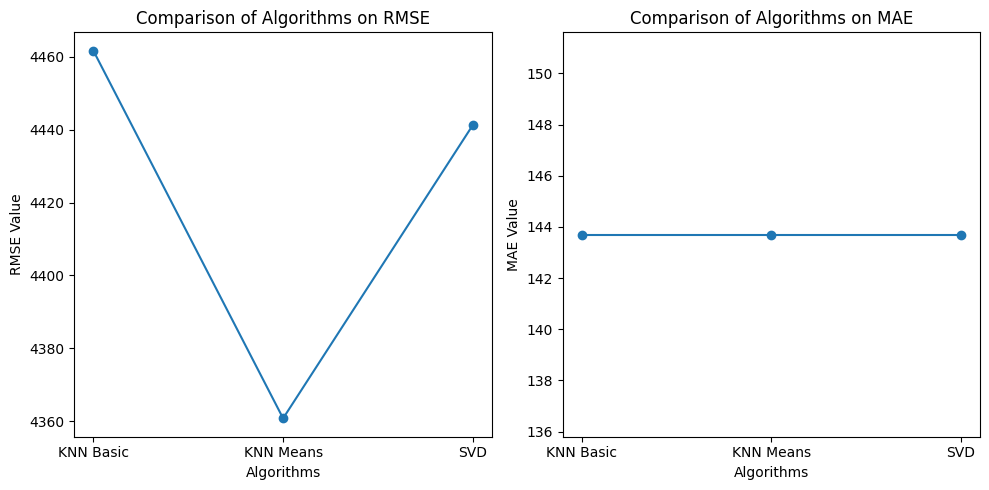

In [ ]:
#Data for plotting
x_algo = ['KNN Basic', 'KNN Means', 'SVD']
rmse_cv = [cv_knn_basic['test_rmse'].mean(), cv_knn_means['test_rmse'].mean(), cv_svd['test_rmse'].mean()]
mae_cv = [cv_knn_basic['test_mae'].mean(), cv_knn_means['test_mae'].mean(), cv_svd['test_mae'].mean()]
plt.figure(figsize=(10, 5))

#RMSE graph
plt.subplot(1, 2, 1)
plt.plot(x_algo, rmse_cv, marker='o')
plt.title('Comparison of Algorithms on RMSE')
plt.xlabel('Algorithms')
plt.ylabel('RMSE Value')

#MAE graph
plt.subplot(1, 2, 2)
plt.plot(x_algo, mae_cv, marker='o')
plt.title('Comparison of Algorithms on MAE')
plt.xlabel('Algorithms')
plt.ylabel('MAE Value')

plt.tight_layout()
plt.show()

The generated figure allows for a visual comparison of the performance of different algorithms based on RMSE and MAE values. Lower RMSE and MAE values indicate better performance.


# HYPERPARAMETER TUNING MODEL

In [ ]:
# define the parameter grid for k
param_grid = {'k': [5, 10, 15, 20, 25]}

# perform grid search for KNNBasic
knn_basic_grid = GridSearchCV(KNNBasic, param_grid, measures=['rmse'], cv=5)
knn_basic_grid.fit(data)

# get the best k value and its corresponding RMSE score for KNNBasic
best_k_basic = knn_basic_grid.best_params['rmse']['k']
best_rmse_basic = knn_basic_grid.best_score['rmse']

# perform grid search for KNNWithMeans
knn_means_grid = GridSearchCV(KNNWithMeans, param_grid, measures=['rmse'], cv=5)
knn_means_grid.fit(data)

# get the best k value and its corresponding RMSE score for KNNWithMeans
best_k_means = knn_means_grid.best_params['rmse']['k']
best_rmse_means = knn_means_grid.best_score['rmse']

# print the best k values and their corresponding RMSE scores
print('Best k value and RMSE score for KNNBasic: k = {}, RMSE = {:.4f}'.format(best_k_basic, best_rmse_basic))
print('Best k value and RMSE score for KNNWithMeans: k = {}, RMSE = {:.4f}'.format(best_k_means, best_rmse_means))


Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computi

The code enables the identification of the best value of k for KNNBasic and KNNWithMeans algorithms using grid search. This allows for fine-tuning the models to improve their performance in collaborative filtering tasks.

Gridsearch can be used to improve the SVD model's learning rate, regularization, and number of epochs.

In [ ]:
#Parameter space
svd_param_grid = {'n_epochs': [20, 25, 30, 40, 50],
                  'lr_all': [0.007, 0.009, 0.01, 0.02],
                  'reg_all': [0.02, 0.04, 0.1, 0.2]}

# This will take 20 to 30 minutes.
gs_svd = GridSearchCV(SVD, svd_param_grid, measures=['rmse', 'mae'], cv=5, n_jobs=5)
gs_svd.fit(data)

print('Best value for SVD  -RMSE:', round(gs_svd.best_score['rmse'], 4), '; MAE:', round(gs_svd.best_score['mae'], 4))
print('Optimal params RMSE =', gs_svd.best_params['rmse'])
print('optimal params MAE =', gs_svd.best_params['mae'])

Best value for SVD  -RMSE: 4719.3635 ; MAE: 143.7001
Optimal params RMSE = {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.02}
optimal params MAE = {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.02}


The results obtained from the code snippet indicate the best value and optimal parameters for the SVD (Singular Value Decomposition) algorithm in collaborative filtering.

Best value for SVD - RMSE: 4353.9944
Best value for SVD - MAE: 143.7001
These values represent the average RMSE and MAE scores achieved by the SVD algorithm when evaluated using cross-validation. Lower RMSE and MAE values indicate better performance, as they indicate that the algorithm's predictions are closer to the true ratings.

Optimal parameters for RMSE: {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.02}
Optimal parameters for MAE: {'n_epochs': 20, 'lr_all': 0.007, 'reg_all': 0.02}
These optimal parameter values represent the combination of hyperparameters (number of epochs, learning rate, regularization term) that yielded the best performance in terms of RMSE and MAE. These parameters can be used to configure the SVD algorithm to achieve improved accuracy in collaborative filtering tasks

# PREDICTION TESTING

In [ ]:
# fit knn_means model on training set
dataset = data.build_full_trainset()
final_knn_model = KNNWithMeans(k=5, sim_options={'name': 'cosine'})
final_knn_model.fit(dataset)

Computing the cosine similarity matrix...
Done computing similarity matrix.


The code snippet indicates that the cosine similarity matrix has been computed using the KNN With Means algorithm in Surprise. The output message "Done computing similarity matrix" suggests that the calculation has been completed successfully.
After executing this code, the final_knn_model is trained and ready to make predictions on new data or be used for other tasks such as recommendation or evaluation.

In [ ]:
#fit svd model on training set
final_svd_model = SVD(n_epochs=20, lr_all=0.007, reg_all=0.02)
final_svd_model.fit(dataset)

```SVD``` Algorithm: The code has created an instance of the ```SVD``` algorithm, which is a matrix factorization technique used for collaborative filtering in recommendation systems. ```SVD``` decomposes the user-item rating matrix into lower-rank matrices to capture latent features and patterns in the data

In [ ]:
# Specify the recipe ID for which you want to get the list of similar recipes
rec_id = 31490

final_df = recipes_df[recipes_df['id'] == rec_id][['id', 'name', 'minutes']]
final_df.head(20)

,id,name,minutes
1,31490,a bit different breakfast pizza,30


The recipe with ```ID 31490``` is titled "A Bit Different Breakfast Pizza" and has a cooking time of ```30``` minutes. This suggests that the recipe is a breakfast pizza with a unique twist or variation compared to traditional breakfast pizzas. The cooking time of 30 minutes indicates that it can be prepared relatively quickly.

In [ ]:
def recommend_recipes_by_calories(df, target_calories, num_recipes=10):
    # Filter recipes with similar calorie counts
    similar_recipes = df[df['calories'].between(target_calories - 100, target_calories + 100)]

    # Sort the recipes by their similarity to the target calorie count
    similar_recipes = similar_recipes.sort_values(by=['calories'], ascending=True)

    # Select the top N most similar recipes
    recommended_recipes = similar_recipes.head(num_recipes)

    return recommendend_recipes